# 기계학습(Machine Learning) 알고리즘

## 정규화 방법론(Regularized Method, Penalized Method, Contrained Least Squares)

> **"선형회귀 계수(Weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법"**  
> **"과최적화는 계수 크기를 과도하게 증가하는 경향이 있기에, 정규화 방법에서의 제약 조건은 일반적으로 계수의 크기를 제한하는 방법"**  

## 정규화 회귀분석 알고리즘

**0) Standard Regression:** 

<center>
$\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2\Biggr]$
</center>

<span style="color:blue">
큰 맥락으로서, 회기분석은 $y=f(x)$ 에서 $y$의 원인으로 $x$를 찾는게 아니고, $y-f(x)$ 의 잔차를 최소화 하는 $f$를 찾는게 핵심이다.
</span>


**1) Ridge Regression:**  
- **정규화조건/패널티/제약조건:** 추정계수의 제곱합을 최소로 하는 것 

\begin{align*}
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \beta_i^2\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}


- <span style="color:blue">
위 식과 비교하면, 추가된 항이 작아지려면 결국 $\beta$ 가 작아야된다.
</span>


- **하이퍼파라미터($\lambda$):** 기존의 잔차 제곱합과 추가 제약 조건의 비중을 조절하기 위한 하이퍼모수(hyperparameter)  
    - $\lambda$=0: 일반적인 선형 회귀모형(OLS)  
    - $\lambda$를 크게 두면 정규화(패널티) 정도가 커지기 때문에 가중치($\beta_i$)의 값들이 커질 수 없음(작아짐)  
    - $\lambda$를 작게 두면 정규화(패널티) 정도가 작아 지기 때문에 가중치($\beta_i$)의 값들의 자유도가 높아져 커질 수 있음(커짐) 


- <span style="color:blue">
계수가 작아진다는건 무슨 뜻일까?
    
    - 계수가 엄청 크다는건, 다른 feature 들에 비해 dependency가 엄청 크다는거. -> 다른 feature들이 전혀 중요하지 않다는 결론이 나옴
    
    - 현실적인(이상적인) 해석을 하기 위해서는 $\beta$ 값이 적절한 수준이어야 한다. -> 그런의미에서 Ridge가 왜 나왔는지 이해할 수 있다.
    
</span>


**2) Lasso(Least Absolute Shrinkage and Selection Operator) Regression:**  
- **정규화조건/패널티/제약조건:** 추정계수의 절대값 합을 최소로 하는 것

\begin{align*}
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \left|\beta_i \right|\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}


- <span style="color:blue">
효과가 작은 $X$ 를 바로 버려주는 방법(?). == 다중공선선을 제거해줌 (비슷한 feature 제거), 그리고 multi correlation 값을 좀 줄여줌
    

</span>


<center><img src='Image/Ridge_Lasso.png' width='600'></center> 


**3) Elastic Net:**  
- **정규화조건/패널티/제약조건:** 추정계수의 절대값 합과 제곱합을 동시에 최소로 하는 것

\begin{align*}
\hat{\beta} &= arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda_1 \displaystyle \sum_{i=0}^k \left|\beta_i \right| + \lambda_2 \displaystyle \sum_{i=0}^k \beta_i^2\Biggr] \\ &where~\lambda_1~and~\lambda_2~are~hyper~parameters(given~by~human)
\end{align*}

### 하이퍼파라미터 특성 및 요약

- **최적 정규화(최적 하이퍼파라미터 추정):** 하이퍼파라미터(Hyperparameter)에 따른 검증성능 차이 존재
    - **Train Set:** 하이퍼파라미터가 작으면 작을수록 좋아짐(과최적화)
    - **Test Set:** 하이퍼파라미터가 특정한 범위에 있을때 좋아짐(추정필요)


- **Summary**  

> - **Standard:** 
    <center><img src='Image/Regression_Result_Standard.png' width='400'></center>  
> - **Ridge:** 
    - 알고리즘이 모든 변수들을 포함하려 하기 때문에 계수의 크기가 작아지고 모형의 복잡도가 줄어듬  
    - 모든 변수들을 포함하려 하므로 변수의 수가 많은 경우 효과가 좋지 않으나 과적합(Overfitting)을 방지하는데 효과적
    - 다중공선성이 존재할 경우, 변수 간 상관관계에 따라 계수로 다중공선성이 분산되기에 효과가 높음
    - <span style="color:blue"> $\beta$ 가 작다는건 x에 대해 y가 sensitive 하게 바뀌지 않다 -> 과적합 방지 </span>     
    <center><img src='Image/Regression_Result_Ridge1.png' width='400'><img src='Image/Regression_Result_Ridge2.png' width='400'></center>   

> - **LASSO:**  
    - 알고리즘이 최소한의 변수를 포함하여 하기 때문의 나머지 변수들의 계수는 0이됨 (Feature Selection 기능)  
    - 변수선택 기능이 있기에 일반적으로 많이 사용되는 이점이 있지만 특정변수에 대한 계수가 커지는 단점 존재  
    - 다중공선성이 존재할 경우, 특정 변수만을 선택하는 방식이라 **Ridge**에 비해 다중공선성 문제에 효과가 낮음  
    <center><img src='Image/Regression_Result_Lasso1.png' width='400'><img src='Image/Regression_Result_Lasso2.png' width='400'></center>
    
> - **Elastic Net:**  
    - 큰 데이터셋에서 Ridge와 LASSO의 효과를 모두 반영하기에 효과가 좋음 (적은 데이터셋은 효과 낮음)  
    <center><img src='Image/Regression_Result_EN.png' width='400'></center>  
    
- **파라미터 세팅(실습)**
    > **1) "statsmodels":** 선형 회귀모형 클래스의 fit_regularized 메서드를 사용하여 Ridge/LASSO/Elastic Net 계수 추정
    - **Ridge:** 
    <center>
    $\lambda_1 = 0,~~0 < \lambda_2 < 1 \\ => L_1 = 0,~~alpha \ne 0$
    </center>
    - **LASSO:** 
    <center>
    $0 < \lambda_1 < 1,~~\lambda_2 = 0 \\ => L_1 = 1,~~alpha \ne 0$
    </center>
    - **Elastic Net:** 
    <center>
    $0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$
    </center>
    
    > **2) "sklearn":** 정규화 회귀모형을 위한 Ridge, Lasso, ElasticNet 별도 클래스 제공
    - [**Ridge:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
    <center>
    $0 < (\lambda = alpha) < 1$
    </center>
    
    - [**LASSO:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
    <center>
    $0 < (\lambda = alpha) < 1$
    </center>
    
    - [**Elastic Net:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
    <center>
    $0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$
    </center>
    
~~~
# Ridge
fit = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# LASSO
fit = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# Elastic Net
fit = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

### 실습

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print('Data View')
display(pd.concat([pd.DataFrame(y, columns=['diabetes_value']), pd.DataFrame(X, columns=diabetes.feature_names)], axis=1).head())

Data View


diabetes_value       age       sex       bmi        bp        s1        s2  \
0           151.0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1            75.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2           141.0  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3           206.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4           135.0  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   

         s3        s4        s5        s6  
0 -0.043401 -0.002592  0.019908 -0.017646  
1  0.074412 -0.039493 -0.068330 -0.092204  
2 -0.032356 -0.002592  0.002864 -0.025930  
3 -0.036038  0.034309  0.022692 -0.009362  
4  0.008142 -0.002592 -0.031991 -0.046641

In [4]:
alpha_weight = 0.5
fit = Ridge(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=[f'alpha = {alpha_weight}'])

alpha = 0.5
0    152.133484
1     20.137357
2   -131.242606
3    383.481783
4    244.837872
5    -15.187056
6    -58.344798
7   -174.842798
8    121.985055
9    328.499702
10   110.886036

In [5]:
alpha_weight = 0.5
fit = Lasso(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])

alpha = 0.5
0    152.133484
1      0.000000
2     -0.000000
3    471.038733
4    136.507108
5     -0.000000
6     -0.000000
7    -58.319549
8      0.000000
9    408.023324
10     0.000000

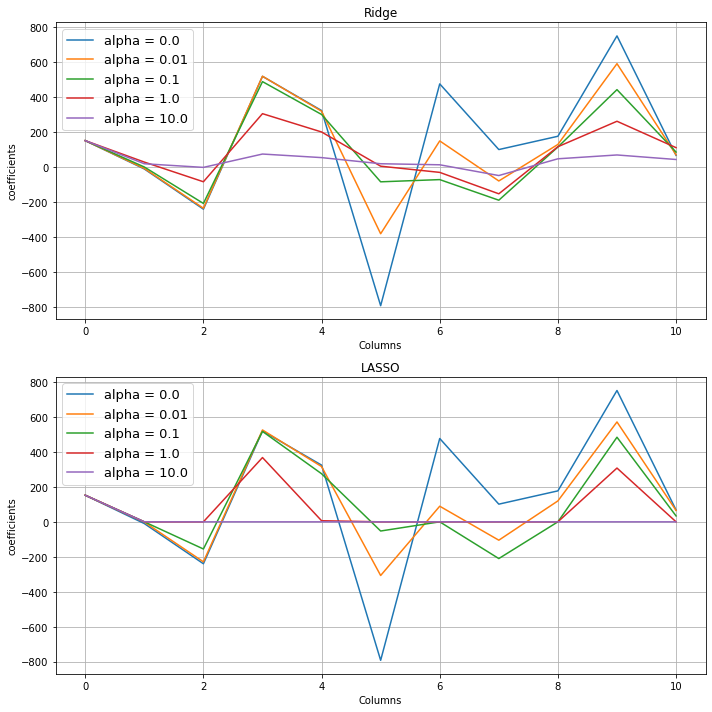

In [6]:
result_Ridge = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    fit = Ridge(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])
    result_Ridge = pd.concat([result_Ridge, result_coef], axis=1)

result_LASSO = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    fit = Lasso(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])
    result_LASSO = pd.concat([result_LASSO, result_coef], axis=1)
    
result_Ridge.plot(figsize=(10,10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.grid()
result_LASSO.plot(legend=True, ax=plt.subplot(212))
plt.title('LASSO')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.tight_layout()
plt.grid()
plt.show()

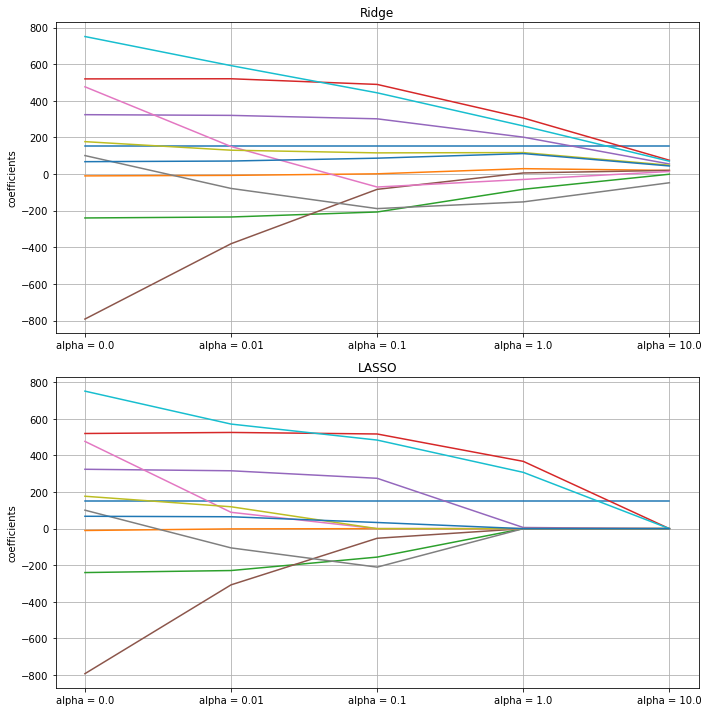

In [7]:
result_Ridge.T.plot(figsize=(10,10), legend=False, ax=plt.subplot(211))
plt.title('Ridge')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.grid()
result_LASSO.T.plot(legend=False, ax=plt.subplot(212))
plt.title('LASSO')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.tight_layout()
plt.grid()
plt.show()

## Bagging and Boosting 모델

### 편향-분산 상충관계(Bias-variance Trade-off)  

**1) 편향과 분산의 정의**
> **(비수학적 이해)**
> - **편향(Bias):** 점추정  
    - 예측값과 실제값의 차이  
    - 모델 학습시 여러 데이터로 학습 후 예측값의 범위가 정답과 얼마나 멀리 있는지 측정  
> - **편향(Bias(Real)):** 모형화(단순화)로 미처 반영하지 못한 복잡성  
    <U>=> 편향이 작다면 Training 데이터 패턴(복잡성)을 최대반영 의미</U>  
    <U>=> 편향이 크다면 Training 데이터 패턴(복잡성)을 최소반영 의미</U>  
> - **분산(Variance):** 구간추정  
    - 학습한 모델의 예측값이 평균으로부터 퍼진 정도(변동성/분산)  
    - 여러 모델로 학습을 반복한다면, 학습된 모델별로 예측한 값들의 차이를 측정
> - **분산(Variance(Real)):** 다른 데이터(Testing)를 사용했을때 발생할 변화  
    <U>=> 분산이 작다면 다른 데이터로 예측시 적은 변동 예상</U>  
    <U>=> 분산이 크다면 다른 데이터로 예측시 많은 변동 예상</U>  
    
<center><img src='Image/Bias_Variance1.jpeg' width='400'></center>

> **(수학적 이해)**

\begin{align*}
\text{Equation of Error} && Err(x) &= E\Bigl[\bigl(Y-\hat{f}(x)\bigr)^2 \Bigr] \\
&& &= \Bigl(E[\hat{f}(x)] - f(x)\Bigr)^2 + E \Bigl[\bigl(\hat{f}(x) - E[\hat{f}(x)]\bigr)^2 \Bigr] + \sigma_{\epsilon}^2 \\
&& &= \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\end{align*}

**2) 편향과 분산의 관계**
- **모델의 복잡도가 낮으면 Bias가 증가하고 Variance가 감소(Underfitting)**  
: 구간추정 범위는 좁으나 점추정 정확성 낮음  
: Training/Testing 모두 예측력이 낮음
- **모델의 복잡도가 높으면 Bias가 감소하고 Variance가 증가(Overfitting)**  
: 점추정 정확성은 높으나 구간추정 범위는 넓음  
: Training만 잘 예측력 높고 Testing은 예측력 낮음  
- **Bias와 Variance가 최소화 되는 수준에서 모델의 복잡도 선택**  

<center><img src='Image/Bias-Variance-Tradeoff.png' width='400'></center>
<center><img src='Image/Bias_Variance4.png' width='400'></center>

**3) 편향과 분산 모두를 최소화하는 방법**
<center><img src='Image/Bias_Variance_Reduce.png' width='600'></center>

### Bagging vs Boosting

> **앙상블(Ensemble, Ensemble Learning, Ensemble Method)이란 머신러닝에서 여러개의 모델을 학습시켜,  
그 모델들의 예측결과들을 이용해 하나의 모델보다 더 나은 값을 예측하는 방법**

- **Bagging(Bootstrap Aggregating):**   
    - 부트스트래핑(Bootstraping): 예측값과 실제값의 차이 중복을 허용한 리샘플링(Resampling)  
    - 페이스팅(Pasting): 이와 반대로 중복을 허용하지 않는 샘플링  


- **Boosting:**   
    - 성능이 약한 학습기(weak learner)를 여러 개 연결하여 강한 학습기(strong learner)를 만드는 앙상블 학습  
    - 앞에서 학습된 모델을 보완해나가면서 더나은 모델로 학습시키는 것  

<center><img src='Image/Bagging_Boosting.png' width='700'></center> 

| - | Bagging | Boosting |
|-------------|---------------------------------------|-----------------------------------------|
| 특징 | 병렬 앙상블 모델(각 모델은 서로 독립) | 연속 앙상블 모델(이전 모델의 오류 반영) |
| 목적 | Variance 감소 | Bias 감소 |
| 적합한 상황 | Low Bias + High Variance | High Bias + Low Variance |
| Sampling | Random Sampling | Random Sampling with weight on error |

### Bagging 알고리즘

- **의사결정나무(Decision Tree):**  

<center><img src='Image/Bagging_DT.png' width='700'></center> 

- **렌덤포레스트(Random Forest):** 여러개의 의사결정나무(Decision Tree) 생성한 다음, 각 개별 트리의 예측값들 중 가장 많은 선택을 받은 변수들로 예측하는 알고리즘, 의사결정나무의 CLT버전

<center><img src='Image/Bagging_RF.jpg' width='700'></center> 


- <span style="color:blue"> CLT(중심극한정리) 와 비슷하다.    </span> 
- <span style="color:blue"> CLT : 모집단의 대표값을 여러 소집단의 대표값을의 평균?을 쓰는 방법 </span> 


~~~
# DecisionTree
fit = DecisionTreeRegressor().fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# RandomForestRegressor
fit = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

### Boosting 알고리즘

- **Adaptive Boosting(AdaBoost):** 학습된 모델이 과소적합(학습하기 어려운 데이터)된 학습 데이터 샘플의 가중치를 높이면서 더 잘 적합되도록 하는 방식

<center><img src='Image/Boosting_AdaBoost.png' width='600'></center> 

- **Gradient Boosting Machine(GBM):** 아다부스트 처럼 학습단계 마다 데이터 샘플의 가중치를 업데이트 하는 것이 아니라, 학습 전단계 모델에서의 잔차(Residual)을 모델에 학습시키는 방법

<center><img src='Image/Boosting_GBM.png' width='600'></center> 

<span style="color:blue"> Adaptive Boosting, GBM 모두 잔차를 통해 알고리즘의 성능을 향상시킨다. 즉, 잔차진단 모델이다
</span>

- **XGBoost(eXtreme Gradient Boosting):** 높은 예측력으로 많은 양의 데이터를 다룰 때 사용되는 부스팅 알고리즘  

<center><img src='Image/Boosting_XGBoost.png' width='600'></center> 

- **LightGBM:** 현존하는 부스팅 알고리즘 중 가장 빠르고 높은 예측력 제공

<center><img src='Image/Boosting_LightGBM.png' width='600'></center> 

| Algorithms | Specification | Others |
|------------|-------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| AdaBoost | 다수결을 통한 정답분류 및 오답에 가중치 부여 | - |
| GBM | 손실함수(검증지표)의 Gradient로 오답에 가중치 부여 | - |
| XGBoost | GMB대비 성능향상<br/>시스템(CPU, Mem.) 자원 효율적 사용 | 2014년 공개 |
| LightGBM | XGBoost대비 성능향상 및 자원소모 최소화<br/>XGBoost가 처리하지 못하는 대용량 데이터 학습가능<br/>근사치분할(Approximates the Split)을 통한 성능향상 | 2016년 공개 |

~~~
# GradientBoostingRegression
fit = GradientBoostingRegressor(alpha=0.1, learning_rate=0.05, loss='huber', criterion='friedman_mse',
                                           n_estimators=1000, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# XGBoost
fit = XGBRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# LightGMB
fit = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

<span style="color:blue"> 
생각해보면 ML 의 Boosting, bagging은 그냥 일반적인 데이터 분석 과정을 그대로 밟는다.
    
중심극한정리를 사용해서 하나의 target을 맞추고 (Bagging), 잔차진단을 통해 정확성을 높인다 (Boosting)
    
</span>

### 비교

<center><img src='Image/Bagging_Boosting2.png' width='600'></center> 

## 회귀분석 알고리즘 정리

- **변수 세팅에 따른 분류:**

<center><img src='Image/Regression-Algorithms-Tree1.png' width='800'></center> 


<span style="color:blue">

* Multivariate
  * $y_1, y_2$ 와 $x_1, x_2$ 의 관계, 즉 여러 input, output 을 한번에 예측하는 모형

* Univariate
    * Single : $y=aX$
    * Multiple : $y=aX_1 + bX_2 + ...$
    * Auto regressive : $y_t = aX_1 + bX_2 + cy_{t-1} + ...$
    (보통 시계열은 Auto regressive 쪽으로 많이 공부한다)
</span>



- **문제 해결에 따른 분류:**

<center><img src='Image/Regression-Algorithms-Tree2.png' width='800'></center> 